# New Mexico Employment EDA - July 2021
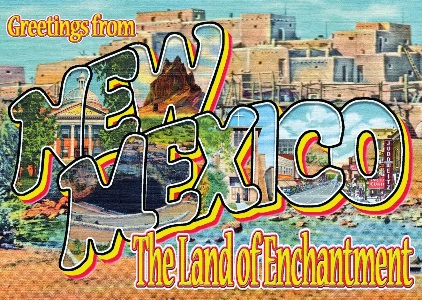

<div class="alert alert-block alert-info">

# Project Background
The data was gathered from the New Mexico Department of Workforce government and U.S. Economic Development Department. The data was from surveys from U.S. Census Bureau.

## New Mexico Department of Workforce Solutions
https://www.jobs.state.nm.us/vosnet/lmi/default.aspx
#### Current Employment Statistics
* The population being represented by the data are the current workforce of New Mexico, not including those in farm work, supervisory roles, armed forces, self-employed, proprietors, domestic workers, unpaid family workers, railroad workers, and those looking for employment.
* The sample size includes data for almost every industry from the North American Industry Classification System, https://www.census.gov/naics/?58967?yearbck=2017. New Mexico total population, as of 2018, was 2,088,070 and 57.4 were participating in the labor force in 2017.
* This data is from the Current Employment Survey that surveys production and nonsupervisotry employees, including private-sector employees on business payrolls.

#### Local Area Unemployment Statistics
* This data is from a Federal-State cooperative, Current Population Survey.

#### Quarterly Census of Employment and Wages
* This data is produce between the Bureau of Labor Statistics and the State Employment Security Agencies and represents covered worksers who worked or received pay.

#### Occupation Employment Projections
* This data comes from a larger report, Occupational Employment and wage Statistics report, from the Beureau of Labor Statistics.

## US Economic Development Department
Link: https://gonm.biz/site-selection/census-data
#### Comparative Economic Characteristics
* The data is from US Census Bureau and American Community Survey.
    
## Important to note:
As I was looking more into the data, I realized that for Current Employment Statistics, Local Area Unemployment Statistics, Quarterly Census of Employment and Wages, and the Occupational Employment Projections have suppressed data categories. Government/public sources are required to suppress data for small populations when releasing the data to the public. The Comparative Economic Characteristics data was aggregated over the years 2013-2017, so no data is suppressed since the data is just an estimate for the time frame. The data was downloaded in July 2021.
</div>

<div class="alert alert-block alert-success"><b>Goals</b><br>
I want to analyze work data from New Mexico by counties. When I was looking over the data I chose, I saw that many are related based on either New Mexico counties or Metropolitan Statistical Areas (MSA). I want to understand what are popular areas of work, who resides in each county, and to see if there are trends between the years.
During the middle of working with the data, I became interested in knowing how the top performing, Los Alamos County, low performing, and area around Albuquerque (Albuquerque MSA or Bernalillo County) performed for certain employment statistics. 

### Hypothesis
The years leading upto the COVID-19 pandemic will show positive growth in New Mexico Employment, and data available for 2020 will show decrease in New Mexico Employment. Also, the healthcare and related industries would be expected to grow in New Mexico and be well-payed.</div>

_________
# Initial Data Loading

In [1]:
import pandas as pd

# read in current employment data from 2017 - 2021
employment_2017 = pd.read_csv('current_employment/current_employment_2017.csv')
employment_2018 = pd.read_csv('current_employment/current_employment_2018.csv')
employment_2019 = pd.read_csv('current_employment/current_employment_2019.csv')
employment_2020 = pd.read_csv('current_employment/current_employment_2020.csv')
employment_2021 = pd.read_csv('current_employment/current_employment_2021.csv')

# read in local area unemployment data from 2017 - 2021
unemployment_2017 = pd.read_csv('local_area_unemployment/local_area_unemployment_2017.csv')
unemployment_2018 = pd.read_csv('local_area_unemployment/local_area_unemployment_2018.csv')
unemployment_2019 = pd.read_csv('local_area_unemployment/local_area_unemployment_2019.csv')
unemployment_2020 = pd.read_csv('local_area_unemployment/local_area_unemployment_2020.csv')
unemployment_2021 = pd.read_csv('local_area_unemployment/local_area_unemployment_2021.csv')

# read in quarterly census employment and wages data from 2017 to 2020
employment_wages_2017 = pd.read_csv('quarterly_census_employment_wages/quarterly_census_employment_wages_2017.csv')
employment_wages_2018 = pd.read_csv('quarterly_census_employment_wages/quarterly_census_employment_wages_2018.csv')
employment_wages_2019 = pd.read_csv('quarterly_census_employment_wages/quarterly_census_employment_wages_2019.csv')
employment_wages_2020 = pd.read_csv('quarterly_census_employment_wages/quarterly_census_employment_wages_2020.csv')

# read in projection data occupation and employment
occupational_projections = pd.read_csv('projections/occupational_employment_growth_2018_2028.csv')

# read in census data from 2013 - 2017
econ_characteristics_est = pd.read_excel('census/Comparative_Economic_Characteristics_2013_2017.xls')

### Current Employment

In [2]:
# create function to iterate through df list to show info, head, and tail results
def explore_data(initial_data):
    if type(initial_data) is list:
        for i in initial_data:
            i.info()
            display(i.head())
            display(i.tail())
    else:
        initial_data.info()
        display(initial_data.head())
        display(initial_data)

In [ ]:
# Create list of df names
employment_lst = [employment_2017, employment_2018, employment_2019,
          employment_2020, employment_2021]

# iterate through df list to show info, head, and tail results
explore_data(employment_lst)

### Unemployment

In [ ]:
unemployment_list = [unemployment_2017,unemployment_2018, unemployment_2019,
                     unemployment_2020,unemployment_2021]

# iterate through df list to show info, head, and tail results
explore_data(unemployment_list)

### Employment and Wages

In [ ]:
employment_wages_list = [employment_wages_2017, employment_wages_2018,
                         employment_wages_2019, employment_wages_2020]

# iterate through df list to show info, head, and tail results
explore_data(employment_wages_list)

### Occupational Projections

In [ ]:
# iterate through df list to show info, head, and tail results
explore_data(occupational_projections)

### Economic Characteristics

In [ ]:
# iterate through df list to show info, head, and tail results
explore_data(econ_characteristics_est)

__________
# Data Cleaning + Insights

### Current Employment 
| Column | Type | Description |
| --- | --- | --- |
|areaname| string |Geographic area name. |
|seriestitle | string | Short title used to identify industry division. |
|CURempces| int | Number of all workers employed by place of work; actual number, not in thousands. |
|CURhours| int | Average hours worked per week for production workers. |
|CURearnings| int |Average weekly earnings for production workers. |
| CURhourearn | int | Average hourly earnings for production workers. |
| CURhoursallwrkr | int | Average hours worked per week for all workers. |
| CURearningsallwrkr | int | Average weekly earnings for all workers. |
| CURhourearnallwrkr | int |Average hourly earnings for production workers. |
|CURperiodyear| string | year |
|YearEmploymentChangeAll| int | Number of employees change from previous year|

In [ ]:
# Check the values for employment columns
employment_columns = list(employment_2021.columns)
for i in employment_columns:
    display(employment_2021[i].value_counts())

<div class="alert alert-block alert-warning">
<b>Suppressed Data: </b>
    <br>
    <code>CURsupppw == 1, suppress production workers employed</code>
<br>
<code>
s;    1326
Name: CURempprodwrk, dtype: int64
s;    1326
Name: CURempfemale, dtype: int64
s;    1326
Name: CURhours, dtype: int64
s;    1326
Name: CURearnings, dtype: int64
s;    1326
    Name: CURhourearn, dtype: int64
</code>
A considerable amount of current data in the 2017 employment data is suppressed.
</div>

In [ ]:
# Look at employment data where the some data has been suppressed
# CURsupppw == 1, suppress production workers employed
suppressed = employment_2017.loc[employment_2017['CURsupppw'] == 1]
[display(suppressed[i].value_counts()) for i in list(suppressed.columns)]

<div class="alert alert-block alert-warning">
<b>Suppressed Data: </b>
    <br>
Additionally, all types of industries have some suppressed data, as seen in the graph of suppressed data in 2017 by industry titles.
</div>

<BarContainer object of 31 artists>

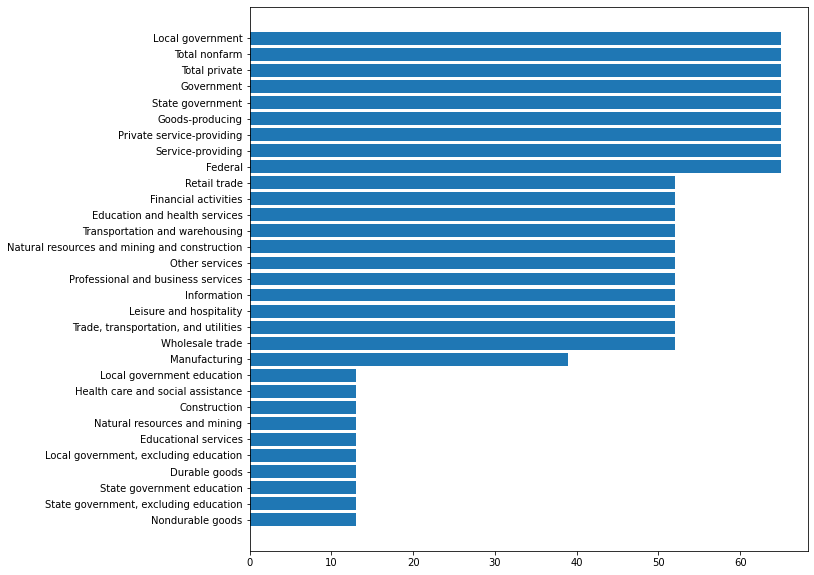

In [10]:
import matplotlib.pyplot as plt

# Show the types of industry with suppressed numbers of production workers employed
# Show number of times industry apppears
organizations = suppressed['seriestitle'].value_counts().sort_values(axis='index').reset_index()
plt.subplots(figsize=(10,10))
plt.barh(y=organizations['index'], width=organizations['seriestitle'])

<div class="alert alert-block alert-warning">
<b>2021 Data</b>
    <br>
There is only data available from January to June for 2021, so the column 'Timeperiod' in the 2021 employment csv does not yet have a year filled in, unlike the other years. 2021 data is grouped by 'seriestitle' and 'areaname' and the median of any numerical column is taken, including 'YearEmploymentChangeAll'.
</div>

In [11]:
employment_2021['Timeperiod'].value_counts()

January, 2021     981
February, 2021    981
April, 2021       981
May, 2021         981
March, 2021       981
June, 2021        279
Name: Timeperiod, dtype: int64

In [12]:
print(f"Employment_2017 shape before: {employment_2017.shape}")

# Select rows of train with NM and with years set to a specific year
employment_2017 = employment_2017.loc[(employment_2017['Stateabbrv'] == 'NM') 
                                      & (employment_2017['Timeperiod'] == '2017')]
employment_2018 = employment_2018.loc[(employment_2018['Stateabbrv'] == 'NM') 
                                      & (employment_2018['Timeperiod'] == '2018')]
employment_2019 = employment_2019.loc[(employment_2019['Stateabbrv'] == 'NM') 
                                      & (employment_2019['Timeperiod'] == '2019')]
employment_2020 = employment_2020.loc[(employment_2020['Stateabbrv'] == 'NM') 
                                      & (employment_2020['Timeperiod'] == '2020')]
employment_2021 = employment_2021.loc[employment_2021['Stateabbrv'] == 'NM'].groupby(by=['seriestitle', 'areaname']).median().reset_index()

# Check the df had changed
display(employment_2017['Stateabbrv'].value_counts())
display(employment_2017['Timeperiod'].value_counts())

Employment_2017 shape before: (13339, 86)


NM    103
Name: Stateabbrv, dtype: int64

2017    103
Name: Timeperiod, dtype: int64

<div class="alert alert-block alert-warning">
<b>2021 Data</b>
    <br>
Since 2021 data is still being collected, the data I downloaded does not have all of the same columns as the other years and needs to have a seperate column drop list.
</div>

In [13]:
# Choose columns from current employment df to drop
employment_drop = ['AreaColumns','Timecolumns', 'dataValue',
                    'stfips', 'areatype', 'Stateabbrv',
                    'seriescode','adjusted', 'CURsupprecord',
                    'CURsupphe', 'CURsupppw','CURsuppfem',
                    'CURsuppheallwrkr','CURprelim', 'CURperiodtype',
                    'PYempces', 'PYempprodwrk', 'PYempfemale',
                    'PYhours', 'PYearnings','PYhourearn',
                    'PYhoursallwrkr', 'PYearningsallwrkr',
                    'PYhourearnallwrkr', 'PYsupprecord',
                    'PYsupphe', 'PYsupppw', 'PYsuppfem',
                    'PYsuppheallwrkr','PMempprodwrk',
                    'PMempfemale', 'PMhours', 'PMearnings',
                    'PMhourearn','PMhoursallwrkr',
                    'PMhourearnallwrkr', 'PMearningsallwrkr',
                    'PMsupprecord', 'PMsupphe', 'PMsupppw',
                    'PMsuppfem','PMsuppheallwrkr', 'PYprelim',
                    'PMempces','PMprelim', 'CURperiod',
                    'PMperiodyear', 'PMperiodtype', 'PMperiod',
                    'PYperiodyear','PYperiodtype', 'PYperiod',
                   'PriorMonthTimeperiod',
                    'PriorYearTimeperiod','MonthSpanTimeperiod',
                    'YearSpanTimeperiod', 'Sortperiod',
                    'Fullperiod','Rank', 'MonthEmploymentChangeAll',
                    'MonthEmploymentChangeProd','SeriesLevel',
                    'ChildPrefix','HasChildren', 'ParentCode',
                    'Preliminary', 'PriorMonthPreliminary',
                    'PriorYearPreliminary', 'CURempprodwrk', 'CURempfemale',
                   'YearEmploymentChangeProd', 'area', 'seriesselection', 'CURperiodyear',
                  'maparea']

employment_2021_drop = ['AreaColumns', 'Timecolumns', 'dataValue',
                        'stfips','areatype', 'area', 'maparea',
                        'seriescode', 'adjusted','CURsupprecord',
                        'CURsupphe', 'CURsupppw', 'CURsuppfem',
                        'CURsuppheallwrkr', 'CURprelim', 'PYempces',
                        'PYsupprecord', 'PYsupphe','PYsupppw', 'PYsuppfem',
                        'PYsuppheallwrkr', 'PYprelim', 'PMempces',
                        'PMsupprecord', 'PMsupphe', 'PMsupppw',
                        'PMsuppfem', 'PMsuppheallwrkr','PMprelim','CURperiodyear',
                        'CURperiodtype', 'CURperiod','PMperiodyear',
                        'PMperiodtype', 'PMperiod','PYperiodtype', 'PYperiod',
                        'Fullperiod', 'Sortperiod', 'Rank','MonthEmploymentChangeAll',
                        'SeriesLevel','ChildPrefix', 'HasChildren', 'ParentCode',
                       'PYperiodyear']

# drop columns for each year of current employment dfs
employment_2017 = employment_2017.drop(columns=employment_drop)
employment_2018 = employment_2018.drop(columns=employment_drop)
employment_2019 = employment_2019.drop(columns=employment_drop)
employment_2020 = employment_2020.drop(columns=employment_drop)
employment_2021 = employment_2021.drop(columns=employment_2021_drop)


In [14]:
# Merge all employment dfs
employment = pd.concat([employment_2017, employment_2018,
                       employment_2019, employment_2020,
                       employment_2021])
# Check the shape
employment.shape

(515, 11)

In [ ]:
employment_col = list(employment.columns)
for i in employment_col:
    display(employment[i].value_counts())

In [16]:
employment.loc[employment['CURearnings'] != 's;']

,areaname,seriestitle,CURempces,CURhours,CURearnings,CURhourearn,CURhoursallwrkr,CURearningsallwrkr,CURhourearnallwrkr,Timeperiod,YearEmploymentChangeAll
110,New Mexico,Manufacturing,26400.0,38.8,674.73,17.39,s;,s;,s;,2017,-500.0
108,New Mexico,Manufacturing,27300.0,38.8,701.89,18.09,s;,s;,s;,2018,900.0
109,New Mexico,Manufacturing,28600.0,39.0,764.01,19.59,s;,s;,s;,2019,1300.0
110,New Mexico,Manufacturing,26800.0,36.4,738.55,20.29,s;,s;,s;,2020,-1800.0
0,New Mexico,Construction,48200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1750.0
...,...,...,...,...,...,...,...,...,...,...,...
98,Santa Fe MSA,Transportation and warehousing,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
99,Albuquerque MSA,Wholesale trade,10950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-450.0
100,Las Cruces MSA,Wholesale trade,1400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
101,New Mexico,Wholesale trade,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-650.0


<div class="alert alert-block alert-warning">
<b>Suppressed/Missing Data</b>
    <br>
'CURhours', 'CURearnings', 'CURhourearn' only have data for Manufacturing for all of New Mexico. Any other industry and does not have data available.
</div>

In [17]:
employment.loc[employment['CURhourearn'] != 's;']

,areaname,seriestitle,CURempces,CURhours,CURearnings,CURhourearn,CURhoursallwrkr,CURearningsallwrkr,CURhourearnallwrkr,Timeperiod,YearEmploymentChangeAll
110,New Mexico,Manufacturing,26400.0,38.8,674.73,17.39,s;,s;,s;,2017,-500.0
108,New Mexico,Manufacturing,27300.0,38.8,701.89,18.09,s;,s;,s;,2018,900.0
109,New Mexico,Manufacturing,28600.0,39.0,764.01,19.59,s;,s;,s;,2019,1300.0
110,New Mexico,Manufacturing,26800.0,36.4,738.55,20.29,s;,s;,s;,2020,-1800.0
0,New Mexico,Construction,48200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1750.0
...,...,...,...,...,...,...,...,...,...,...,...
98,Santa Fe MSA,Transportation and warehousing,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
99,Albuquerque MSA,Wholesale trade,10950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-450.0
100,Las Cruces MSA,Wholesale trade,1400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
101,New Mexico,Wholesale trade,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-650.0


In [18]:
employment.loc[employment['CURhours'] != 's;']

,areaname,seriestitle,CURempces,CURhours,CURearnings,CURhourearn,CURhoursallwrkr,CURearningsallwrkr,CURhourearnallwrkr,Timeperiod,YearEmploymentChangeAll
110,New Mexico,Manufacturing,26400.0,38.8,674.73,17.39,s;,s;,s;,2017,-500.0
108,New Mexico,Manufacturing,27300.0,38.8,701.89,18.09,s;,s;,s;,2018,900.0
109,New Mexico,Manufacturing,28600.0,39.0,764.01,19.59,s;,s;,s;,2019,1300.0
110,New Mexico,Manufacturing,26800.0,36.4,738.55,20.29,s;,s;,s;,2020,-1800.0
0,New Mexico,Construction,48200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1750.0
...,...,...,...,...,...,...,...,...,...,...,...
98,Santa Fe MSA,Transportation and warehousing,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
99,Albuquerque MSA,Wholesale trade,10950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-450.0
100,Las Cruces MSA,Wholesale trade,1400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
101,New Mexico,Wholesale trade,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-650.0


<div class="alert alert-block alert-success">
    <b>Hypothesis: Over the years</b>
    <br>
The figure shows the positive progression most industries were experiencing with an increase in the number of employees from 2017-2019. 2020 saw the most dramatic decline of employees, and 2021 continued to see a decline in the number of employees.
</div>

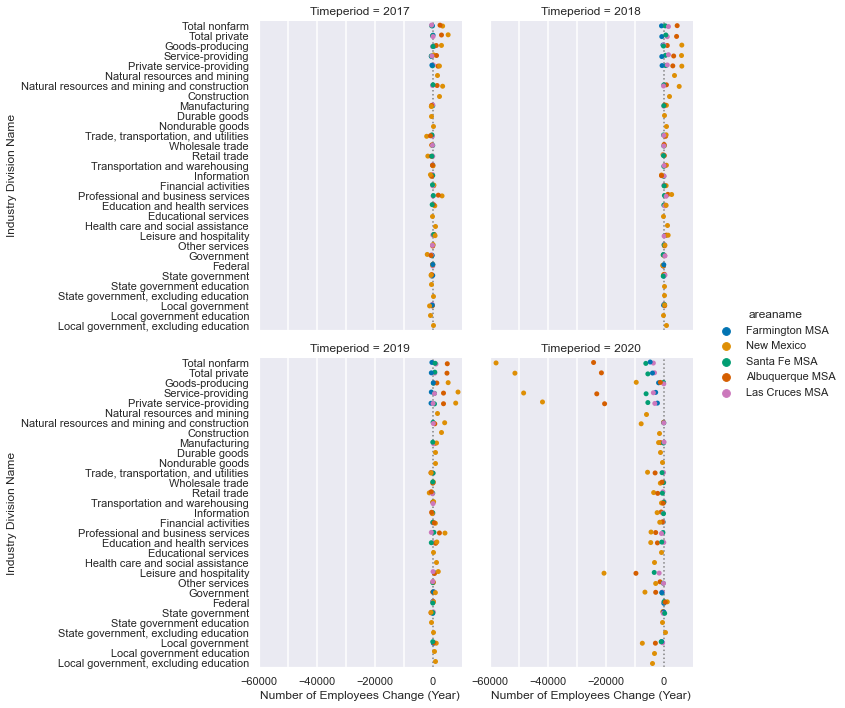

In [19]:
import seaborn as sns

sns.set_theme(style="dark")

grid = sns.catplot(x='YearEmploymentChangeAll', y='seriestitle', hue='areaname',
              col='Timeperiod', kind='strip',palette='colorblind',
              data=employment, height=5, legend_out=True, col_wrap = 2,
                  )
grid.refline(x=0, linestyle=':')
grid.refline(x=-50000, linestyle='-', color='white')
grid.refline(x=-40000, linestyle='-', color='white')
grid.refline(x=-30000, linestyle='-', color='white')
grid.refline(x=-20000, linestyle='-', color='white')
grid.refline(x=-10000, linestyle='-', color='white')

grid.set_axis_labels(x_var='Number of Employees Change (Year)',
                    y_var='Industry Division Name')
grid.set(xlim=(-60000,10000))
grid.savefig('New_Mexico_No_Employee_Change_By_Industry_17_20.png')

_______________
### Unemployment Data
| Column | Type | Description |
| --- | --- | --- |
|Areaname| string | Geographic area name. |
|Timeperiod| int | month and year |
|Laborforce|int | Civilian labor force. |
|Emplab|int | Number employed by place of residence. |
|Unemp|int | Number unemployed. |
|Unemprate|int |Unemployment rate. |

In [ ]:
# Show each column value counts for unemployment_2017 df
[display(unemployment_2017[i].value_counts())
 for i in list(unemployment_2017.columns)]

<div class="alert alert-block alert-warning">
<b>2021 Data</b>
    <br>
Similar to the employment data, there is only data available from January to June for 2021,so the column 'Timeperiod' does not yet have data by year, unlike the other years. 2021 data is grouped by 'Areaname' and the median of any numerical column is taken.
</div>

In [21]:
unemployment_2021['Timeperiod'].value_counts()

May, 2021         43
February, 2021    43
April, 2021       43
June, 2021        43
January, 2021     43
March, 2021       43
Name: Timeperiod, dtype: int64

In [22]:
print(f"Unemployment 2017 shape before{unemployment_2017.shape}")

# Select rows of train with NM and with years not set to a specific year
unemployment_2017 = unemployment_2017.loc[(unemployment_2017['Stateabbrv'] == 'NM') 
                                      & (unemployment_2017['Timeperiod'] == '2017')]
unemployment_2018 = unemployment_2018.loc[(unemployment_2018['Stateabbrv'] == 'NM') 
                                      & (unemployment_2018['Timeperiod'] == '2018')]
unemployment_2019 = unemployment_2019.loc[(unemployment_2019['Stateabbrv'] == 'NM') 
                                      & (unemployment_2019['Timeperiod'] == '2019')]
unemployment_2020 = unemployment_2020.loc[(unemployment_2020['Stateabbrv'] == 'NM') 
                                      & (unemployment_2020['Timeperiod'] == '2020')]
unemployment_2021 = unemployment_2021.loc[(unemployment_2021['Stateabbrv'] == 'NM')].groupby(by=['Areaname']).median().reset_index()

print(f"Unemployment 2017 shape after{unemployment_2017.shape}")
display(unemployment_2017['Stateabbrv'].value_counts())
display(unemployment_2017['Timeperiod'].value_counts())

Unemployment 2017 shape before(559, 22)
Unemployment 2017 shape after(42, 22)


NM    42
Name: Stateabbrv, dtype: int64

2017    42
Name: Timeperiod, dtype: int64

In [23]:
unemployment_2021['Timeperiod'] = '2021'
display(unemployment_2021['Timeperiod'].value_counts())

2021    42
Name: Timeperiod, dtype: int64

<div class="alert alert-block alert-warning">
<b>2021 Data</b>
    <br>
Like employment data, 2021 unemployment data is still being collected. The data I downloaded does not have all of the same columns as the other years and needs to have a seperate column drop list.
</div>

In [24]:
# Create list of columns to drop
unemployment_drop = ['Adjusted', 'Areatype', 'Fullperiod',
                     'Period', 'prelim', 'Preliminary', 'Rank',
                     'Sortperiod', 'Stateabbrv', 'Stfips',
                     'Clfprate', 'Emppopratio', 'Periodtype',
                     'Area','Periodyear']
unemployment_2021_drop = ['Adjusted', 'Areatype', 'Fullperiod',
                     'Period', 'prelim', 'Rank',
                     'Sortperiod', 'Stfips',
                     'Clfprate', 'Emppopratio', 'Periodtype',
                     'Area','Periodyear']

# Drop columns in unemployment dfs
unemployment_2017 = unemployment_2017.drop(columns=unemployment_drop)
unemployment_2018 = unemployment_2018.drop(columns=unemployment_drop)
unemployment_2019 = unemployment_2019.drop(columns=unemployment_drop)
unemployment_2020 = unemployment_2020.drop(columns=unemployment_drop)
unemployment_2021 = unemployment_2021.drop(columns=unemployment_2021_drop)

# Check shape of unemployment_2017 df
unemployment_2017.shape

(42, 7)

In [25]:
# Merge all employment dfs
unemployment = pd.concat([unemployment_2017, unemployment_2018,
                       unemployment_2019, unemployment_2020,
                       unemployment_2021])
# Check the shape
unemployment.shape

(210, 7)

In [26]:
unemployment = unemployment.rename(columns={'Areaname': 'areaname'})

<div class="alert alert-block alert-success">
    <b>Hypothesis: Comparison of Counties and Over the Years</b>
    <br>
The unemployment data includes MSA, or metropolitan statistical area, and counties. We see that Bernalilo County and Albuquerque MSA fall in the lower half of the unemployment rate. This was the first place to see that Los Alamos county seems to consistantly have a low unemployment around 3%. Also, Luna County is consitantly has the highest unemployment rate through the years. Similar to the employment data, most counties/MSA's were experiencing a decline in the unemployment rate from 2017 - 2019, and in 2020, experienced an increase in the unemployment rate. Depending on the county, the unemployment rate increased or decreased in 2021. In 2021, the unemployment rate in Luna county increased, and in Los Alamos county, it decreased. 
</div>

c:\users\oimar\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


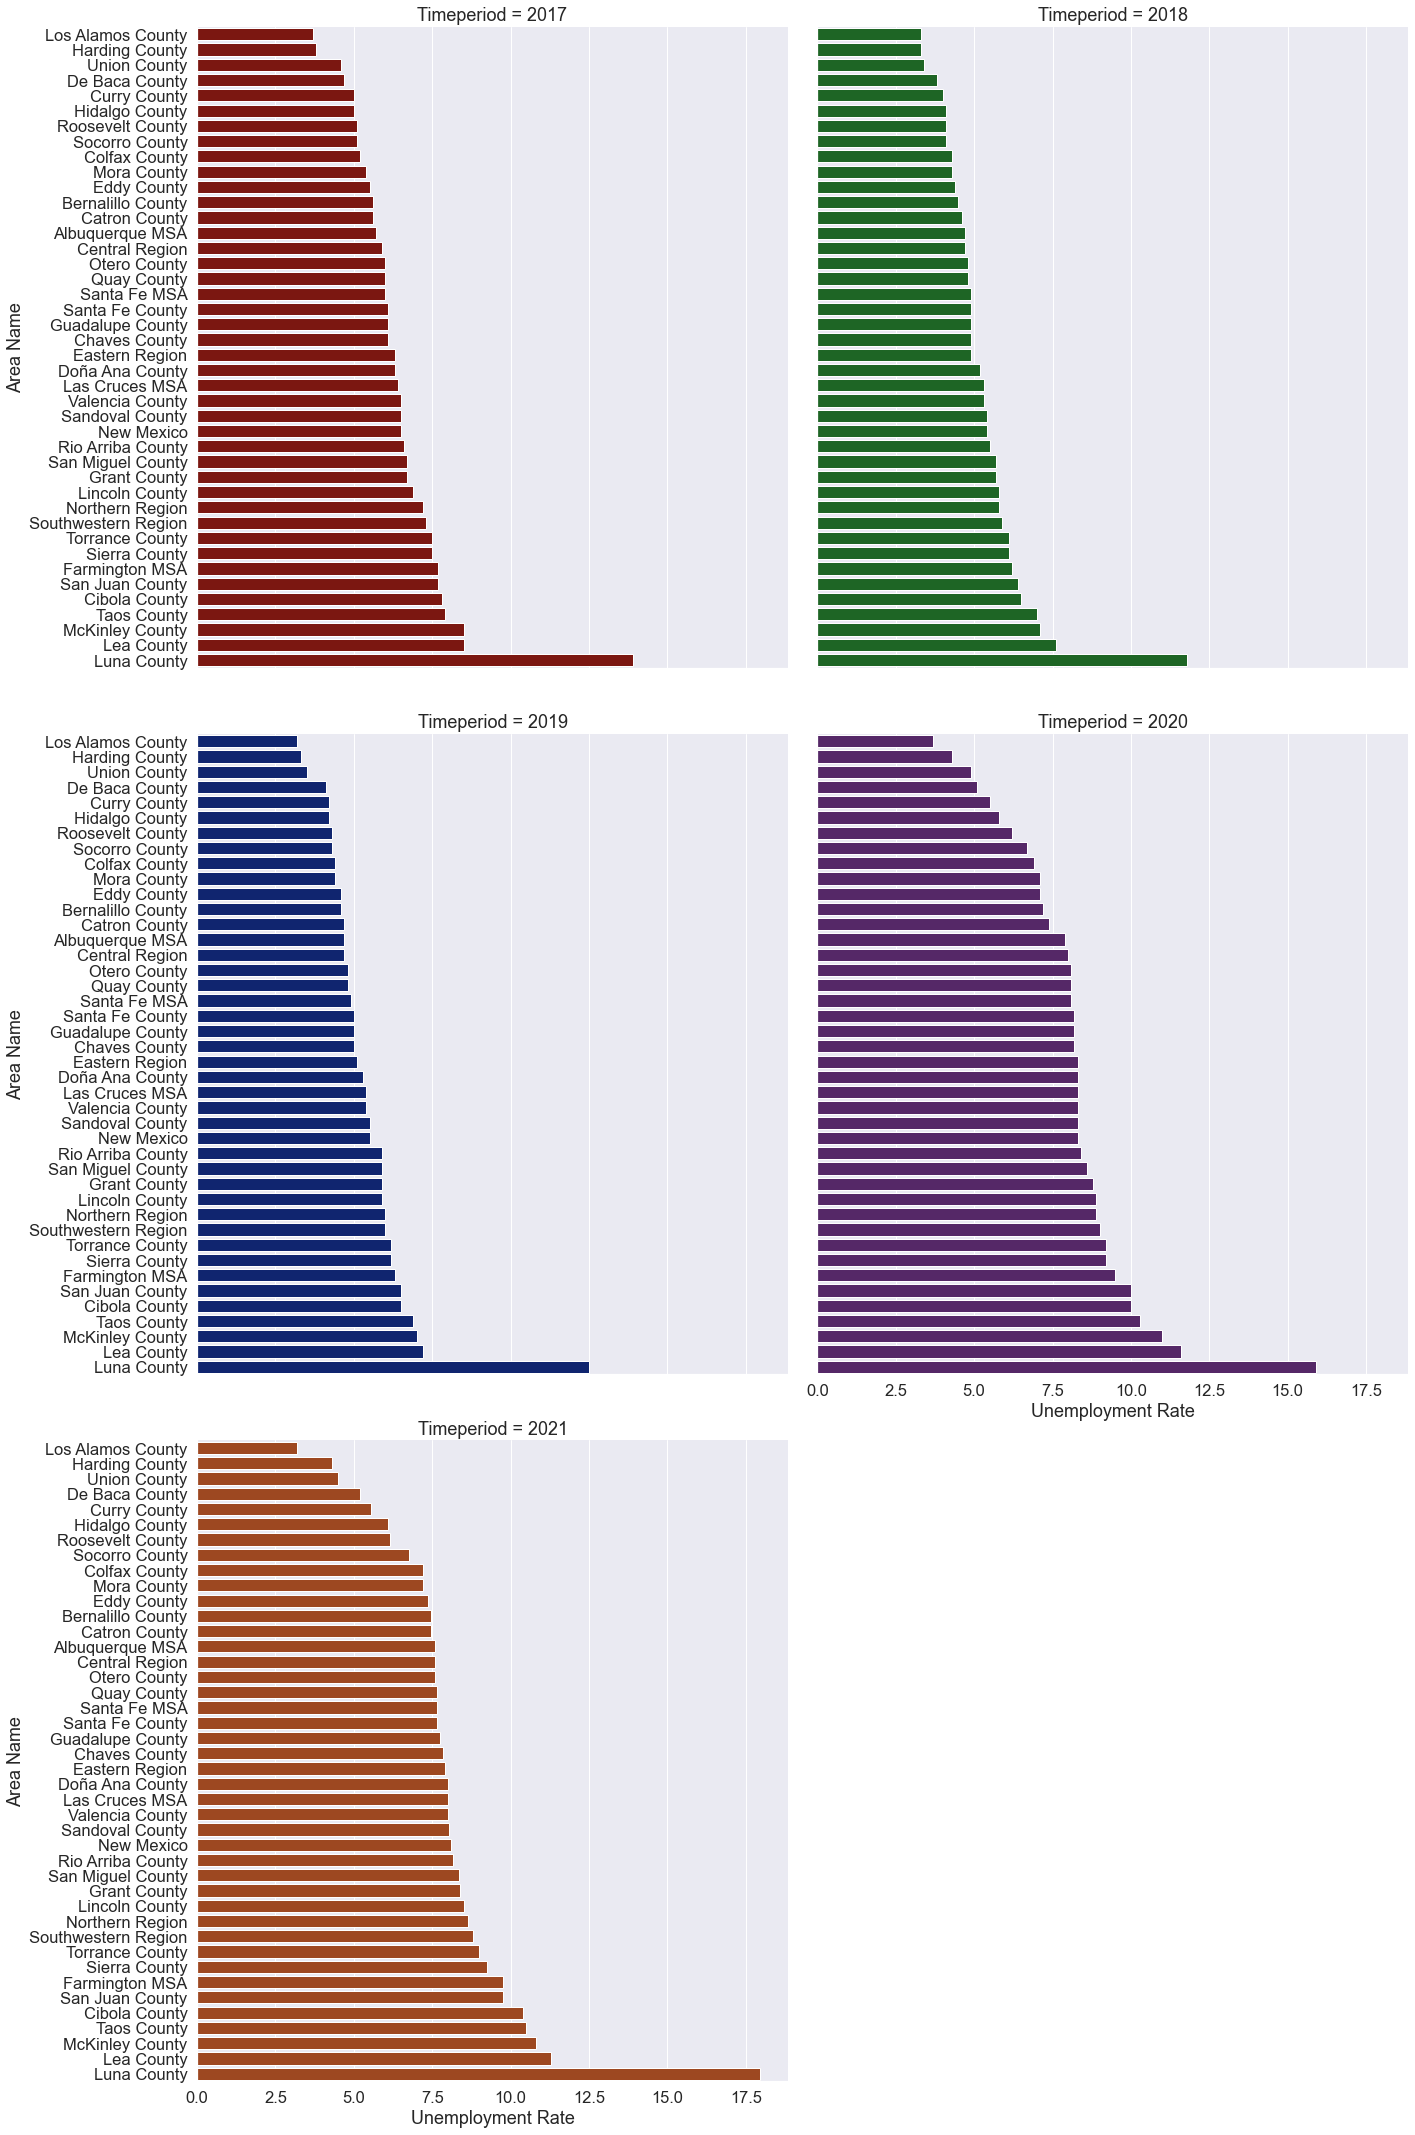

In [27]:
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1.5)

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(unemployment.sort_values('Unemprate',ascending=True), col="Timeperiod", hue="Timeperiod", palette="dark",
                     col_wrap=2, height=10, col_order = ['2017', '2018','2019', '2020', '2021'])

# Draw a line plot to show the trajectory of each random walk
grid.map(sns.barplot, "Unemprate", "areaname")

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
grid.set_axis_labels(x_var='Unemployment Rate',
                    y_var='Area Name')

grid.savefig('Unemployment Rate by County 2017-2020.png')

____________
### Employment and Wages Data
| Column | Type | Description |
| --- | --- | --- |
|areaname|string |Geographic area name. |
|periodyear|int |year |
|ownershipDesc| |description that identifies the employer by public or private ownership. |
|title| string | The descriptive title for this industry code.|
|avgemp|int |The number of workers employed in the industry. |
|estab|int |The number of employer establishments in the industry. (reporting units) |
|totwage| int|The total wages paid to all workers in the industry for the period. |
|topempav|int |Average employment for the quarter or year of the top employer for the specified geography and industry code |
|avgwkwage|int |Average weekly wage per worker. |

In [ ]:
# Look at  column values
[display(employment_wages_2017[i].value_counts()) for i in list(employment_wages_2017.columns)]

<div class="alert alert-block alert-warning">
<b>2019 Missing Data</b>
    <br>
While checking 2017 unemployment data, no significant issues were noticed. However, 2019 data seems to have a lot of missing data or data equal to 0.0, upwards 18,869 observations within 'Avgwkwage' column, as indicated below. 'Avgwkwage' data in other years also has data equal to 0.0, but at minimal counts in comparison to 2019 employment wage data.
</div>

In [29]:
[print(f'''The employment wages df for year,{df['periodyear'].unique()}
has {len(df.loc[df['avgwkwage']==0.0])} number of average weekly wage equal to 0.0
and {len(df['avgwkwage'])} observations\n''')
 for df in employment_wages_list]

display(employment_wages_2019.shape)
employment_wages_2019 = employment_wages_2019.loc[employment_wages_2019['avgwkwage'] != 0.0]
display(employment_wages_2019.shape)

The employment wages df for year,[2017]
has 1 number of average weekly wage equal to 0.0
and 59769 observations

The employment wages df for year,[2018]
has 2 number of average weekly wage equal to 0.0
and 59686 observations

The employment wages df for year,[2019]
has 18869 number of average weekly wage equal to 0.0
and 78531 observations

The employment wages df for year,[2020]
has 8 number of average weekly wage equal to 0.0
and 59884 observations



(78531, 26)

(59662, 26)

In [30]:
employment_wages_drop = ['stfips', 'areatype', 'stateabbrv',
                        'periodtype', 'period', 'prelim',
                        'ownership', 'code', 'realsuppress',
                        'estabRank', 'naicsect','area',
                        'topempav', 'mnth1emp', 'mnth2emp',
                        'mnth3emp']

# Drop columns in unemployment dfs
employment_wages_2017 = employment_wages_2017.drop(columns=employment_wages_drop)
employment_wages_2018 = employment_wages_2018.drop(columns=employment_wages_drop)
employment_wages_2019 = employment_wages_2019.drop(columns=employment_wages_drop)
employment_wages_2020 = employment_wages_2020.drop(columns=employment_wages_drop)

# Check shape of unemployment_2017 df
employment_wages_2017.shape

(59769, 10)

In [31]:
employment_wages = pd.concat([employment_wages_2017, employment_wages_2018,
                       employment_wages_2019, employment_wages_2020])
employment_wages.shape

(239001, 10)

In [ ]:
# Look at  column values
[display(employment_wages[i].value_counts()) for i in list(employment_wages.columns)]

<div class="alert alert-block alert-warning">
<b>White space</b>
    <br>
'areaname' and 'title' columns had a lot of extra white space in the cells, and when used to create a graph, made the axis labels move away from the graph.In order to fix this, the white space was removed using the strip() method.
</div>

In [33]:
display(employment_wages.head())
employment_wages = employment_wages.rename(columns={'areaname': 'longname', 'title': 'longtitle'}, copy=True)
employment_wages['areaname'] = pd.DataFrame([name.strip() for name in employment_wages['longname']])
employment_wages['title'] = pd.DataFrame([name.strip() for name in employment_wages['longtitle']])

employment_wages_list = employment_wages.columns.to_list()
employment_wages_list.remove('longname')
employment_wages_list.remove('longtitle')
employment_wages = employment_wages[employment_wages_list]
display(employment_wages.head())

,maparea,areaname,periodyear,ownershipDesc,title,avgemp,estab,totwage,avgwkwage,suppress
0,3501000000,New Mexico ...,2017,Aggregate of all types,"Total, All Industries ...",817426.0,58569,9.187914e+09,865.0,0
1,3501000000,New Mexico ...,2017,Aggregate of all types,"Total, All Industries ...",808565.0,58068,8.649322e+09,823.0,0
2,3501000000,New Mexico ...,2017,Aggregate of all types,"Total, All Industries ...",813773.0,57771,8.710773e+09,823.0,0
3,3501000000,New Mexico ...,2017,Aggregate of all types,"Total, All Industries ...",802278.0,58183,8.740467e+09,838.0,0
4,3501000000,New Mexico ...,2017,Aggregate of all types,"Total, All Industries ...",810512.0,58104,3.528594e+10,837.0,0


,maparea,periodyear,ownershipDesc,avgemp,estab,totwage,avgwkwage,suppress,areaname,title
0,3501000000,2017,Aggregate of all types,817426.0,58569,9.187914e+09,865.0,0,New Mexico,"Total, All Industries"
1,3501000000,2017,Aggregate of all types,808565.0,58068,8.649322e+09,823.0,0,New Mexico,"Total, All Industries"
2,3501000000,2017,Aggregate of all types,813773.0,57771,8.710773e+09,823.0,0,New Mexico,"Total, All Industries"
3,3501000000,2017,Aggregate of all types,802278.0,58183,8.740467e+09,838.0,0,New Mexico,"Total, All Industries"
4,3501000000,2017,Aggregate of all types,810512.0,58104,3.528594e+10,837.0,0,New Mexico,"Total, All Industries"


<div class="alert alert-block alert-success">
    <b>Hypothesis: Comparison of Counties</b>
    <br>
The bar graph shows the top 10 and bottom 10 industries, plus Health Care and Social Assitance industry, for public and private employers by counties: Los Alamos, Bernanilo, and Luna.

Los Alamos County
<br>
The Real Estate industry either combined or separately private has the highest median average weekly wage. The other top industries in Los Alamos median average weekly wage slight above 1000 when just private employers and under 1000 for private and public employers. Healthcare and Social assistance industry has a median average weekly pay of about $600 with public or private employers. 
</div>

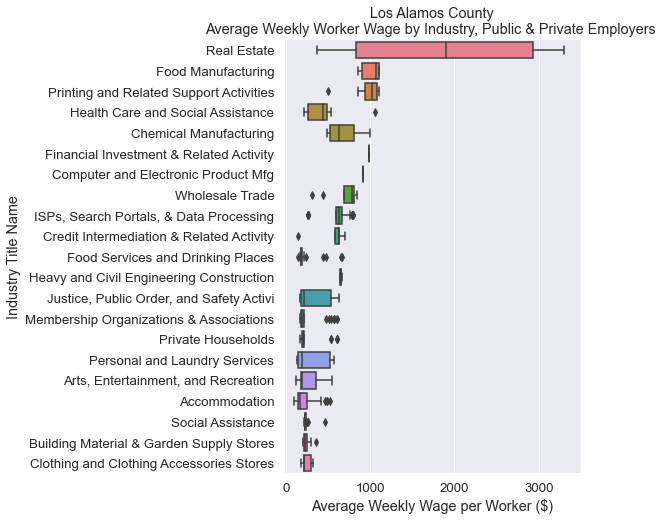

In [34]:
sns.set(font_scale = 1.2)
los_alamos_all =  employment_wages.loc[employment_wages['areaname'] == 'Los Alamos County']

los_alamos_all_top_wages = los_alamos_all['avgwkwage'].groupby(los_alamos_all['title']).agg(['median']).sort_values('median', ascending=False).head(10).reset_index()['title'].to_list()
los_alamos_all_low_wages = los_alamos_all['avgwkwage'].groupby(los_alamos_all['title']).agg(['median']).sort_values('median', ascending=True).head(10).reset_index()['title'].to_list()

los_alamos_all_top_low = los_alamos_all_top_wages + los_alamos_all_low_wages + ['Health Care and Social Assistance']

# Draw a nested boxplot to show bills by day and time
graph = sns.catplot(x="avgwkwage", y='title', palette='husl',
            data=los_alamos_all.loc[los_alamos_all['title'].isin(los_alamos_all_top_low)].sort_values('avgwkwage', ascending=False),
                    orient='h', kind='box', height=7, aspect=1.2)
graph.set_axis_labels(x_var='Average Weekly Wage per Worker ($)',
                    y_var='Industry Title Name')
graph.set_xticklabels(step=1)
graph.set(xlim=(-50,7000))
graph.set(title='Los Alamos County\nAverage Weekly Worker Wage by Industry, Public & Private Employers ')
graph.savefig('ALL_Los_Alamos_County_AvgWklyWrkr_Industry_Title_combine_2017-2020.png')


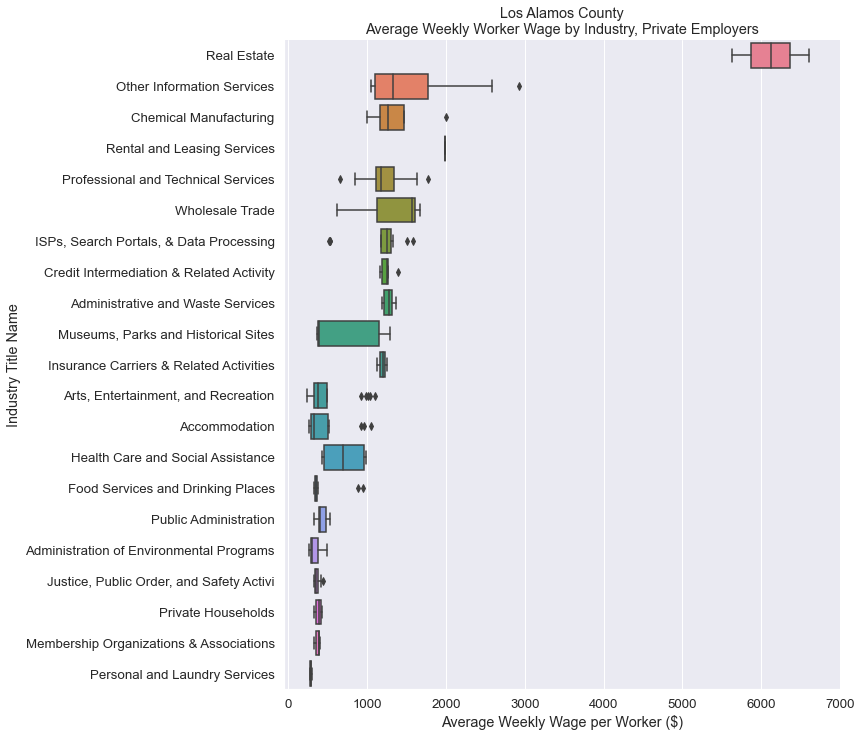

In [35]:
los_alamos_priv =  employment_wages.loc[(employment_wages['ownershipDesc'] == 'Private') &
                              (employment_wages['areaname'] == 'Los Alamos County')]

los_alamos_priv_top_wages = los_alamos_priv['avgwkwage'].groupby(los_alamos_priv['title']).agg(['median']).sort_values('median', ascending=False).head(10).reset_index()['title'].to_list()
los_alamos_priv_low_wages = los_alamos_priv['avgwkwage'].groupby(los_alamos_priv['title']).agg(['median']).sort_values('median', ascending=True).head(10).reset_index()['title'].to_list()

los_alamos_priv_top_low = los_alamos_priv_top_wages + los_alamos_priv_low_wages + ['Health Care and Social Assistance']

# Draw a nested boxplot to show bills by day and time
graph = sns.catplot(x="avgwkwage", y='title', palette='husl',
            data=los_alamos_priv.loc[los_alamos_priv['title'].isin(los_alamos_priv_top_low)].sort_values('avgwkwage', ascending=False),
                    orient='h', kind='box', height=10, aspect=1.2)
graph.set_axis_labels(x_var='Average Weekly Wage per Worker ($)',
                    y_var='Industry Title Name')
graph.set_xticklabels(step=1)
graph.set(xlim=(-50,7000))
graph.set(title='Los Alamos County\nAverage Weekly Worker Wage by Industry, Private Employers')
graph.savefig('Priv_Los_Alamos_County_AvgWklyWrkr_Industry_Title_combine_2017-2020.png')


<div class="alert alert-block alert-success">
    <b>Hypothesis: Comparison of Counties</b>
    <br>
Bernalillo County
<br>
The highest median average weekly pay for Bernalillo county, among public and private employer, was Funds, Trusts & Other Financial Vehicles, and National Secutrity & International Affair.The lowest performing industries were Clothing and Clothing Accessories Stores and Sporting Goods/Hobby/Book/Music Stores. For private employers, the Pipeline Transportation industry and Funds, Trusts & Other Financial Vehicles industries were the top median average weekly pay. Healthcare and Social Assistance industry has a median average weekly salary of under 1000, for pubic or private employers.
</div>

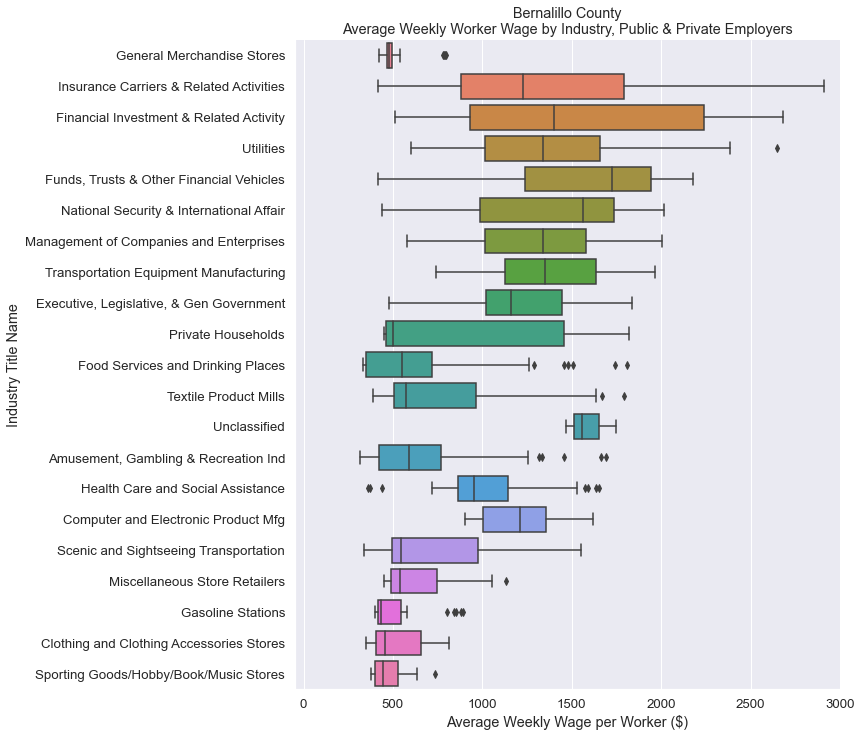

In [36]:
bernalillo_all =  employment_wages.loc[employment_wages['areaname'] == 'Bernalillo County']

bernalillo_all_top_wages = bernalillo_all['avgwkwage'].groupby(bernalillo_all['title']).agg(['median', 'count']).sort_values('median', ascending=False).head(10).reset_index()['title'].to_list()
bernalillo_all_low_wages = bernalillo_all['avgwkwage'].groupby(bernalillo_all['title']).agg(['median', 'count']).sort_values('median', ascending=True).head(10).reset_index()['title'].to_list()

bernalillo_all_top_low = bernalillo_all_top_wages + bernalillo_all_low_wages + ['Health Care and Social Assistance']

# Draw a nested boxplot to show bills by day and time
graph = sns.catplot(x="avgwkwage", y='title', palette='husl',
            data=bernalillo_all.loc[bernalillo_all['title'].isin(bernalillo_all_top_low)].sort_values('avgwkwage',ascending=False),
                    orient='h', kind='box', height=10, aspect=1.2)
graph.set_axis_labels(x_var='Average Weekly Wage per Worker ($)',
                    y_var='Industry Title Name')
graph.set_xticklabels(step=1)
graph.set(xlim=(-50,3000))
graph.set(title='Bernalillo County\nAverage Weekly Worker Wage by Industry, Public & Private Employers')
graph.savefig('ALL_Bernalillo_County_AvgWklyWrkr_Industry_Title_combine_2017-2020.png')

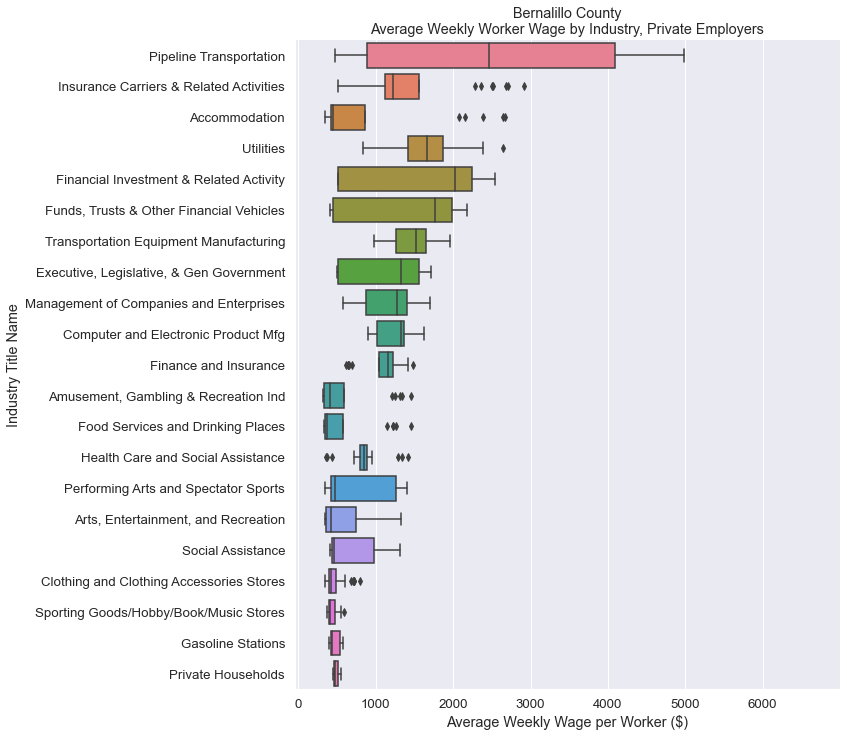

In [37]:
bernalillo_priv =  employment_wages.loc[(employment_wages['ownershipDesc'] == 'Private') &
                              (employment_wages['areaname'] == 'Bernalillo County')]

bernalillo_priv_top_wages = bernalillo_priv['avgwkwage'].groupby(bernalillo_priv['title']).agg(['median', 'count']).sort_values('median', ascending=False).head(10).reset_index()['title'].to_list()
bernalillo_priv_low_wages = bernalillo_priv['avgwkwage'].groupby(bernalillo_priv['title']).agg(['median', 'count']).sort_values('median', ascending=True).head(10).reset_index()['title'].to_list()

bernalillo_priv_top_low = bernalillo_priv_top_wages + bernalillo_priv_low_wages + ['Health Care and Social Assistance']
bernalillo_priv.loc[bernalillo_priv['title'].isin(bernalillo_priv_top_low)]

# Draw a nested boxplot to show bills by day and time
graph = sns.catplot(x="avgwkwage", y='title', palette='husl',
            data=bernalillo_priv.loc[bernalillo_priv['title'].isin(bernalillo_priv_top_low)].sort_values('avgwkwage',ascending=False),
                    orient='h', kind='box', height=10, aspect=1.2)
graph.set_axis_labels(x_var='Average Weekly Wage per Worker ($)',
                    y_var='Industry Title Name')
graph.set_xticklabels(step=1)
graph.set(xlim=(-50,7000))
graph.set(title='Bernalillo County\nAverage Weekly Worker Wage by Industry, Private Employers')
graph.savefig('Priv_Bernalillo_County_AvgWklyWrkr_Industry_Title_combine_2017-2020.png')

<div class="alert alert-block alert-success">
    <b>Hypothesis: Comparison of Counties</b>
    <br>
Luna County
<br>
Similar to the Bernanillo country, the highest median average salary is in the Financial Investment & Related Activity industries among public and private employers. Membership Organizations & Associations and Wood Product Manufacturing are also high paying industries for public and private employers. The lower paying industries include Accomodation and Performing Arts & Spectator Sports for both public and private employers. For just private employers, the top paying industries are: Printing and Related Activities and Heavy and Civil Engineering and low paying industries are: Accomodation and Personal & Laundry Services. Healthcare & Accomodation among public and private or exclusively private employers is below $1000 avgerage weekly pay. 
</div>

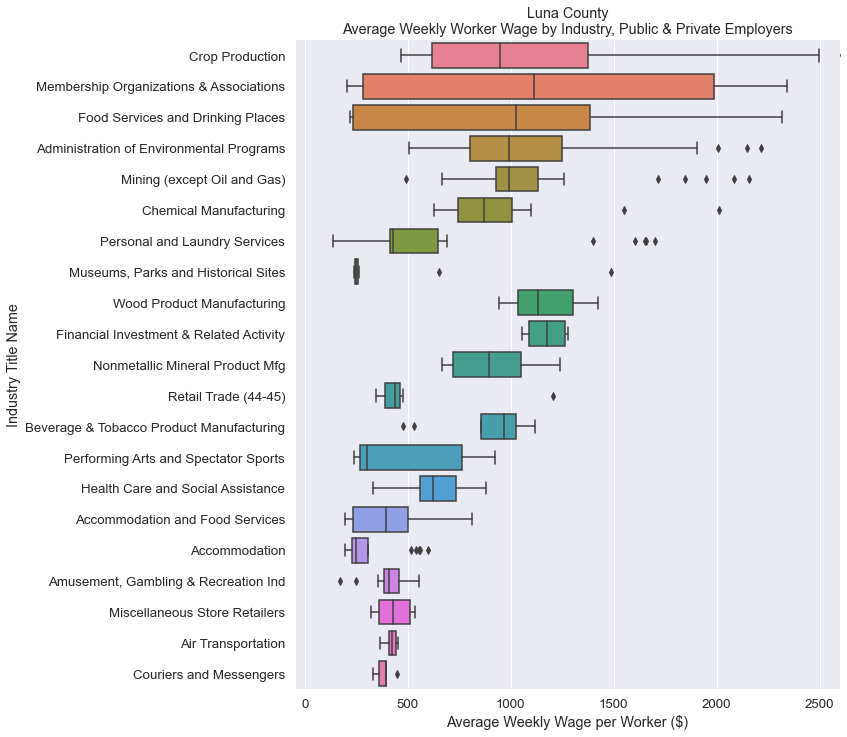

In [38]:
luna_all =  employment_wages.loc[employment_wages['areaname'] == 'Luna County']

luna_all_top_wages = luna_all['avgwkwage'].groupby(luna_all['title']).agg(['median', 'count']).sort_values('median', ascending=False).head(10).reset_index()['title'].to_list()
luna_all_low_wages = luna_all['avgwkwage'].groupby(luna_all['title']).agg(['median', 'count']).sort_values('median', ascending=True).head(10).reset_index()['title'].to_list()

luna_all_top_low = luna_all_top_wages + luna_all_low_wages + ['Health Care and Social Assistance']
luna_all.loc[luna_all['title'].isin(luna_all_top_low)]

# Draw a nested boxplot to show bills by day and time
graph = sns.catplot(x="avgwkwage", y='title', palette='husl',
            data=luna_all.loc[luna_all['title'].isin(luna_all_top_low)].sort_values('avgwkwage', ascending=False),
                    orient='h', kind='box', height=10, aspect=1.2)
graph.set_axis_labels(x_var='Average Weekly Wage per Worker ($)',
                    y_var='Industry Title Name')
graph.set_xticklabels(step=1)
graph.set(xlim=(-50,2600))
graph.set(title='Luna County\nAverage Weekly Worker Wage by Industry, Public & Private Employers')
graph.savefig('ALL_Luna_County_AvgWklyWrkr_Industry_Title_combine_2017-2020.png')

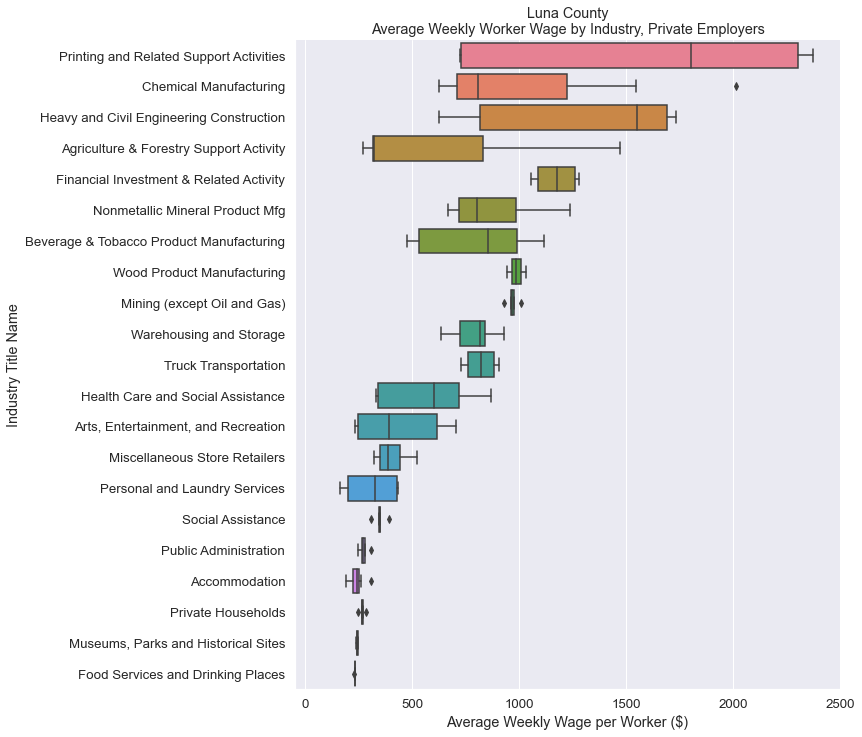

In [39]:
luna_priv =  employment_wages.loc[(employment_wages['ownershipDesc'] == 'Private') &
                              (employment_wages['areaname'] == 'Luna County')]

luna_priv_top_wages = luna_priv['avgwkwage'].groupby(luna_priv['title']).agg(['median', 'count']).sort_values('median', ascending=False).head(10).reset_index()['title'].to_list()
luna_priv_low_wages = luna_priv['avgwkwage'].groupby(luna_priv['title']).agg(['median', 'count']).sort_values('median', ascending=True).head(10).reset_index()['title'].to_list()

luna_priv_top_low = luna_priv_top_wages + luna_priv_low_wages + ['Health Care and Social Assistance']
luna_priv.loc[luna_priv['title'].isin(luna_priv_top_low)]

# Draw a nested boxplot to show bills by day and time
graph = sns.catplot(x="avgwkwage", y='title', palette='husl',
            data=luna_priv.loc[luna_priv['title'].isin(luna_priv_top_low)].sort_values('avgwkwage', ascending=False),
                    orient='h', kind='box', height=10, aspect=1.2)
graph.set_axis_labels(x_var='Average Weekly Wage per Worker ($)',
                    y_var='Industry Title Name')
graph.set_xticklabels(step=1)
graph.set(xlim=(-50,2500))
graph.set(title='Luna County\nAverage Weekly Worker Wage by Industry, Private Employers')
graph.savefig('Priv_Luna_County_AvgWklyWrkr_Industry_Title_combine_2017-2020.png')

____
### Occupational Projection Data
| Column | Type | Description |
| --- | --- | --- |
|maparea| int | |
|areaname| string |Descriptive title of the areatype. |
|estoccprj| int |A value representing a base year employment estimate for an occupation. |
|projoccprj|int | A numerical value representing the projected year employment estimate for an occupation.  |
|grrate| int|A value representing the annualized percentage growth. This value is calculated by dividing the Projected year by the Base year. Taking the results to the 1/n power, where n is the number of years in the projection period, subtracting 1 from the result and multiplying that result by 100. Ie. grrate=(((projemp/estemp)^1/n)-1)\*100 |
|nchg|in|Numeric Change between the projected estimate and the base estimate. |
|pchg|int |Percent change over period.((projemp-estemp)/estemp)\*100 |
|exits|int |The number of exits from the labor force. |
|transfers|int|The number of transfers from one occupation to another |
|change|int |The change in employment from estimated to projected. |
|openings|int |Total openings = Exits+Transfers+Change |
|annualchange|int | The annual change in employment from estimated to projected.|
|annualopenings|int | |
|estyear|string | |
|growdesc|string |Brief description interpreting the growth of the industry or
occupation. |
|codeTitle| string| The descriptive title for this industry code.|
|inDemand|int |0 = not in demand; 1 = in demand |
|green|int |0 = not green; 1 = green |
|Timeperiod | string| |
|SortOcc| string | |

In [ ]:
[display(occupational_projections[i].value_counts())
 for i in list(occupational_projections.columns)]

<div class="alert alert-block alert-warning">
<b>Suppressed data</b>
    <br>
The graph below shows the regions with suppressed data. New Mexico has less suppressed data since any observations are aggregated data from all regions in New Mexico. Observations associated with the U.S. do not show up as data must not need to be suppressed since observations represent aggregate data of all the U.S. states. Since any observations with a '1; in the suppressed column has all values suppressed, any suppressed data will not be selected. 
</div>

<BarContainer object of 9 artists>

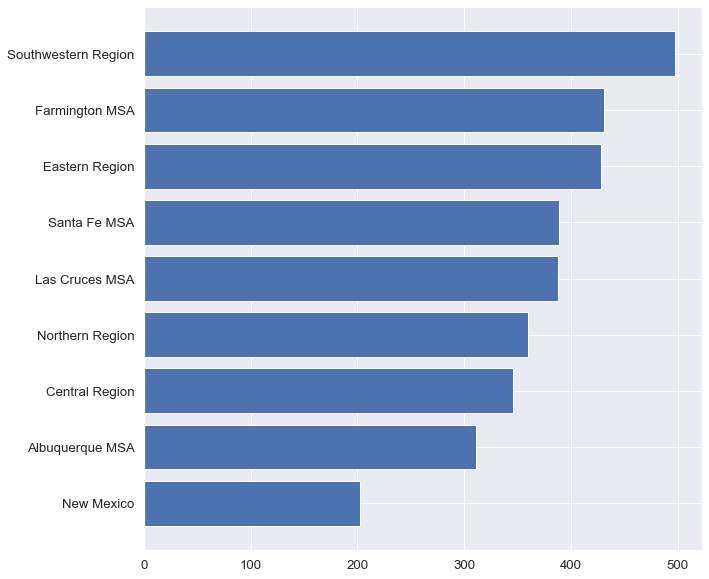

In [41]:
suppress_occ_proj = occupational_projections.loc[occupational_projections['suppress'] == 1]
organizations_occ = suppress_occ_proj['areaname'].value_counts().sort_values(axis='index').reset_index()
plt.subplots(figsize=(10,10))
plt.barh(y=organizations_occ['index'], width=organizations_occ['areaname'])

In [42]:
print(f"Employment_2017 shape before: {occupational_projections.shape}")

# Select rows with NM
occupational_projections = occupational_projections.loc[(occupational_projections['Stateabbrv'] == 'NM') &
                                                       (occupational_projections['suppress'] != 1)]

print(f"Employment_2017 shape after: {occupational_projections.shape}")

# Check the df had changed
display(occupational_projections['Stateabbrv'].value_counts())

occupational_projections_drop = ['stfips', 'areatype','Stateabbrv',
                                 'periodid','PeriodString',
                                 'matoccode', 'aopeng','aopenr',
                                 'aopent', 'growcode', 'suppress',
                                 'estyear', 'projyear', 'codetype',
                                 'occcode', 'codelevel',
                                'regionalInDemand','regionalGreen',
                                'Fullperiod', 'Sortperiod', 'Rank','area']
occupational_projections_na = occupational_projections.drop(columns=occupational_projections_drop)
display(occupational_projections_na.shape)

Employment_2017 shape before: (8220, 44)
Employment_2017 shape after: (3792, 44)


NM    3792
Name: Stateabbrv, dtype: int64

(3792, 22)

<div class="alert alert-block alert-warning">
<b>Cleaning Data</b>
    <br>
Any occupational projection data that is supposed to be a number is actually a string when first downloaded. The columns between 2 - 15 need to be cast as a number.
</div>

In [43]:
# Locate columns 2 -15 of occupational projections na df
occupational_projections_na.iloc[:,2:15] = occupational_projections_na.iloc[:,2:15].apply(pd.to_numeric)
occupational_projections_na.head()
display(occupational_projections_na.shape)

(3792, 22)

In [44]:
# Projected annual openings aggregated by occupations
occupational_projections_na['annualopenings'].groupby(occupational_projections_na['SortOcc']).agg(['min','max','median']).sort_values(by='median',ascending=False)

,min,max,median
SortOcc,,,
AAAAAAAA,6458,110188,18692.0
Food Preparation and Serving Related,1052,16283,2715.0
Office and Administrative Support,703,14503,2194.0
Sales and Related,735,11958,1899.0
Food and Beverage Serving Workers,586,9989,1771.0
...,...,...,...
Podiatrists,2,4,2.0
Postmasters and Mail Superintendents,2,6,2.0
Economists,2,2,2.0


In [45]:
# Projected annual openings aggregated by areaname
occupational_projections_na['annualopenings'].groupby(occupational_projections_na['areaname']).agg(['min','max']).sort_values(by='max',ascending=False)

,min,max
areaname,,
New Mexico,1,110188
Albuquerque MSA,2,49941
Central Region,2,49941
Northern Region,2,25076
Eastern Region,2,18692
Southwestern Region,3,13473
Las Cruces MSA,2,9800
Santa Fe MSA,3,8204
Farmington MSA,1,6458


In [46]:
# New Mexico growth rate agregaated by occupation
growth_rate_NM = occupational_projections_na.loc[occupational_projections_na['areaname'] == 'New Mexico']
growth_rate_NM['grrate'].groupby(growth_rate_NM['SortOcc']).agg(['min', 'max', 'median']).sort_values('median', ascending=False)

,min,max,median
SortOcc,,,
Wind Turbine Service Technicians,7.6130,7.6130,7.6130
Solar Photovoltaic Installers,5.5172,5.5172,5.5172
Information Security Analysts,3.6472,3.6472,3.6472
Personal Care Aides,3.2606,3.2606,3.2606
Statisticians,2.8903,2.8903,2.8903
...,...,...,...
Communications Equipment Operators,-2.6731,-2.6731,-2.6731
"Switchboard Operators, Including Answering Service",-2.6979,-2.6979,-2.6979
"Postal Service Mail Sorters, Processors, and Processing Machine Operators",-2.7071,-2.7071,-2.7071


In [47]:
# Albuquerque MSA growth rate agregaated by occupation
growth_rate_NM = occupational_projections_na.loc[occupational_projections_na['areaname'] == 'Albuquerque MSA']
growth_rate_NM['grrate'].groupby(growth_rate_NM['SortOcc']).agg(['min', 'max', 'median']).sort_values('median', ascending=False)

,min,max,median
SortOcc,,,
Information Security Analysts,3.7424,3.7424,3.7424
Personal Care Aides,3.2832,3.2832,3.2832
Statisticians,3.2055,3.2055,3.2055
Phlebotomists,2.9505,2.9505,2.9505
Mathematicians,2.8152,2.8152,2.8152
...,...,...,...
"Grinding and Polishing Workers, Hand",-2.4479,-2.4479,-2.4479
Data Entry Keyers,-2.4873,-2.4873,-2.4873
"Pressers, Textile, Garment, and Related Materials",-2.5002,-2.5002,-2.5002


<div class="alert alert-block alert-success">
    <b>Hypothesis: Comparison of New Mexico and Albuquerque MSA</b>
    <br>
Information security analysts are expected to grow at a rate between 3.6 and 3.7 in Albuquerque MSA and New Mexico. This data was taken in 2018 prior to the COVID-19 pandemic, so it will be interesting to see how the growth rate actually performs. After generating the first table for New Mexico, I see that personal care aides, an occupation related to health care, is expected to grow by 3.2 percent annually. On the lower growth rates, Postal Services occupations are expected to decline between 2.7 and 3.2 percent, Albuquerque and New Mexico, respectively.
</div>

________
### Census - Economic Characteristics
| Column | Description | Type |
| --- | --- | --- |
|0  | county| string |
| 1 |  Wrkrs_16+ | int|
| 2 |  Pop16+NotinLaborForce        | int | 
| 3  | 'Wrkrs_16+FromHome'| int|
| 4 |  Wrkrs_16+TravelMeanTimetoWork|int |
| 5  | 'TotalHouseholdsMedIncome| int |
| 6 |  NonFamilyHousholdMedFemFTWrkr|int |
| 7 |  'CivilNonInstW/Insurance' | int|
| 8 |  CivilNonInstW/oInsurance| int  |

<div class="alert alert-block alert-warning">
<b>Cleaning Data</b>
    <br>
The economic characteristics data was downloaded as an Excel file. I initially organized the Excel file in Excel to help line up broad categories with specific categories and adjusted headers. The data loaded into the jupyter notebook still has to be cleaned and organized by matching areaname of economic characteristic data with other data areanames. After organizing the economic characteristic data, I selected 8 columns of interest to explore.
</div>

In [48]:
# Rename county columns to match employment, unemployment, and employment/wage df
for col in econ_characteristics_est.columns[3:]:
    econ_characteristics_est.rename(columns={col:col.split(',')[0]}, inplace=True)

# Display level = 0 index, broad category available
econ_info = econ_characteristics_est.transpose(copy=True)

# Set index to first to columns broad category + specific populations
economics = econ_characteristics_est.set_index(['Unnamed: 0', 'Unnamed: 1'])

In [49]:
# create list of dataframes by indexing specific data from index level 1:
economics_append = [economics.xs('    Workers 16 years and over', level=1),
                   economics.xs('      Not in labor force', level=1),
                   economics.xs('      Worked at home', level=1),
                   economics.xs('      Mean travel time to work (minutes)', level=1),
                   economics.xs('      Median household income (dollars)', level=1),
                   economics.xs('      Median earnings for female full-time, year-round workers (dollars)', level=1),
                   economics.xs('      With health insurance coverage', level=1),
                   economics.xs('      No health insurance coverage', level=1)]

economic_est_2013_2017 = pd.concat(economics_append)
economic_est_2013_2017[:2]

,New Mexico,Bernalillo County,Chaves County,Cibola County,Colfax County,Curry County,Doña Ana County,Eddy County,Grant County,Lea County,...,Roosevelt County,Sandoval County,San Juan County,San Miguel County,Santa Fe County,Sierra County,Socorro County,Taos County,Torrance County,Valencia County
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Workers 16 years and over,"875,493","311,619","26,227","9,349","4,634","22,260","88,718","26,188","10,465","28,393",...,"7,809","58,457","50,603","9,161","68,945","3,675","5,791","13,344","5,267","28,158"
Population 16 years and over,41.5%,37.2%,43.0%,46.2%,50.5%,36.2%,40.5%,36.3%,49.6%,39.6%,...,40.5%,40.4%,41.2%,58.5%,39.9%,56.2%,54.2%,44.2%,54.3%,47.4%


In [50]:
# Have counties as a column and other data headers as columns
economic_chars = economic_est_2013_2017.transpose(copy=True).reset_index()
display(economic_chars.shape)
display(economic_chars[:2])

(27, 9)

Unnamed: 0,index,Workers 16 years and over,Population 16 years and over,Workers 16 years and over,Workers 16 years and over,INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS),INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS),HEALTH INSURANCE COVERAGE,HEALTH INSURANCE COVERAGE
0,New Mexico,"875,493",41.5%,4.8%,21.8,"46,718","35,546",87.5%,12.5%
1,Bernalillo County,"311,619",37.2%,4.4%,21.9,"50,386","38,224",89.2%,10.8%


In [57]:
# rename columns with more descriptive names
renaming = ['county','Wrkrs_16+','Pop16+NotinLaborForce',
            'Wrkrs_16+FromHome', 'Wrkrs_16+TravelMeanTimetoWork',
            'TotalHouseholdsMedIncome','NonFamilyHousholdMedFemFTWrkr',
            'CivilNonInstW/Insurance', 'CivilNonInstW/oInsurance']

economic_chars.columns = renaming
display(economic_chars.head())
display(economic_chars.shape)

,county,Wrkrs_16+,Pop16+NotinLaborForce,Wrkrs_16+FromHome,Wrkrs_16+TravelMeanTimetoWork,TotalHouseholdsMedIncome,NonFamilyHousholdMedFemFTWrkr,CivilNonInstW/Insurance,CivilNonInstW/oInsurance
0,New Mexico,"875,493",41.5%,4.8%,21.8,"46,718","35,546",87.5%,12.5%
1,Bernalillo County,"311,619",37.2%,4.4%,21.9,"50,386","38,224",89.2%,10.8%
2,Chaves County,"26,227",43.0%,3.9%,19.8,"42,177","33,109",86.5%,13.5%
3,Cibola County,"9,349",46.2%,7.5%,23.4,"36,089","27,810",85.3%,14.7%
4,Colfax County,"4,634",50.5%,4.6%,15.6,"33,042","29,337",90.4%,9.6%


(27, 9)

<div class="alert alert-block alert-warning">
<b>Cleaning Data</b>
    <br>
The data read in from the Excel file for economic characteristics had all data as strings, so casting all columns as floats was important.
    </div>

In [59]:
# Convert all values from string to float
from locale import atof, setlocale, LC_NUMERIC
setlocale(LC_NUMERIC,'')
economic_chars['Wrkrs_16+'] = [atof(value) for value in economic_chars['Wrkrs_16+']]
economic_chars['Pop16+NotinLaborForce'] = [float(value.strip('%'))/100 for value in economic_chars['Pop16+NotinLaborForce']]
economic_chars['Wrkrs_16+FromHome'] = [float(value.strip('%'))/100 for value in economic_chars['Wrkrs_16+FromHome']]
economic_chars['Wrkrs_16+TravelMeanTimetoWork'] = [atof(value) for value in economic_chars['Wrkrs_16+TravelMeanTimetoWork']]
economic_chars['TotalHouseholdsMedIncome'] = [atof(value) for value in economic_chars['TotalHouseholdsMedIncome']]
economic_chars['NonFamilyHousholdMedFemFTWrkr'] = [atof(value) for value in economic_chars['NonFamilyHousholdMedFemFTWrkr']]
economic_chars['CivilNonInstW/Insurance'] = [float(value.strip('%'))/100 for value in economic_chars['CivilNonInstW/Insurance']]
economic_chars['CivilNonInstW/oInsurance'] = [float(value.strip('%'))/100 for value in economic_chars['CivilNonInstW/oInsurance']]

display(economic_chars.shape)
display(economic_chars.head())


(27, 9)

,county,Wrkrs_16+,Pop16+NotinLaborForce,Wrkrs_16+FromHome,Wrkrs_16+TravelMeanTimetoWork,TotalHouseholdsMedIncome,NonFamilyHousholdMedFemFTWrkr,CivilNonInstW/Insurance,CivilNonInstW/oInsurance
0,New Mexico,875493.0,0.415,0.048,21.8,46718.0,35546.0,0.875,0.125
1,Bernalillo County,311619.0,0.372,0.044,21.9,50386.0,38224.0,0.892,0.108
2,Chaves County,26227.0,0.430,0.039,19.8,42177.0,33109.0,0.865,0.135
3,Cibola County,9349.0,0.462,0.075,23.4,36089.0,27810.0,0.853,0.147
4,Colfax County,4634.0,0.505,0.046,15.6,33042.0,29337.0,0.904,0.096


[(0.0, 35.0),
 Text(0.5, 1.0, 'Mean Travel Time for Workers 16+ \nAll NM Counties and NM \nACS Estimate 2013-2017'),
 Text(0.5, 0, 'Travel Time (Minutes)')]

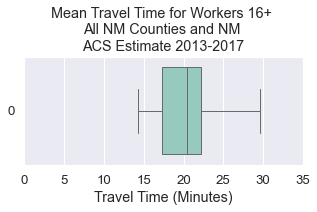

In [60]:
import seaborn as sns
f, ax = plt.subplots(figsize=(5,2))
sns.boxplot(data=economic_chars['Wrkrs_16+TravelMeanTimetoWork'],
               palette='Set3', width=0.8, linewidth=1,
              orient='h')

ax.set(xlim=(0,35), title='Mean Travel Time for Workers 16+ \nAll NM Counties and NM \nACS Estimate 2013-2017',
      xlabel='Travel Time (Minutes)')

In [61]:
economic_chars.describe()

,Wrkrs_16+,Pop16+NotinLaborForce,Wrkrs_16+FromHome,Wrkrs_16+TravelMeanTimetoWork,TotalHouseholdsMedIncome,NonFamilyHousholdMedFemFTWrkr,CivilNonInstW/Insurance,CivilNonInstW/oInsurance
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,64573.222222,0.457593,0.053519,20.562963,43513.740741,34081.111111,0.879519,0.120481
std,172678.701583,0.069632,0.032904,4.259302,16715.737933,9103.701311,0.039306,0.039306
min,2985.000000,0.343000,0.012000,14.300000,26663.000000,24828.000000,0.760000,0.043000
25%,7774.000000,0.404500,0.030000,17.250000,33715.000000,28870.500000,0.860500,0.106000
50%,13649.000000,0.442000,0.045000,20.400000,40470.000000,32539.000000,0.880000,0.120000
75%,28275.500000,0.517000,0.075500,22.200000,48202.000000,35824.500000,0.894000,0.139500
max,875493.000000,0.585000,0.144000,29.600000,110190.000000,73514.000000,0.957000,0.240000


In [62]:
colors_NM = {'New Mexico': '#FF6138','Bernalillo County':'#F7FD04',
             'Chaves County': '#687466', 'Cibola County': '#CD8D7B',
             'Colfax County': '#F7FED8', 'Curry County': '#216583',
             'Doña Ana County': '#884939', 'Eddy County': '#CAA653',
             'Grant County': '#CAA653', 'Lea County':'#E2BCB7',
             'Lincoln County':'#B67162', 'Los Alamos County':'#FF005C',
             'Luna County': '#0CECDD', 'McKinley County':'#DD7631',
             'Otero County': '#708160', 'Quay County': '#D8C593',
             'Rio Arriba County': '#EDD690', 'Roosevelt County': '#706381',
             'Sandoval County':'#062743', 'San Juan County': '#564A4A',
             'San Miguel County':'#FFCAB0', 'Santa Fe County':'#3C2C3E',
             'Sierra County':'#5E454B', 'Socorro County':'#F2A07B',
             'Taos County':'#7D0633', 'Torrance County':'#EBD9DD',
             'Valencia County': '#E6B2C6',
             'Union County': '#F8EEB4',
            'De Baca County': '#FEF6FB',
            'Santa Fe MSA': '#029e73',
            'Albuquerque MSA': '#d55e00',
            'Farmington MSA':'#0173b2' ,
            'Las Cruces MSA': '#cc78bc',
            'Hidalgo County': '#C5D7BD',
            'Central Region': '#516C8D',
            'Eastern Region': '#804D3B',
            'Harding County': '#70560D',
            'Guadalupe County': '#EFD99B',
            'Northern Region': '#E2BCB7',
            'Catron County': '#40A798',
            'Southwestern Region':'#6A0000',
            'Mora County': '#658525'}

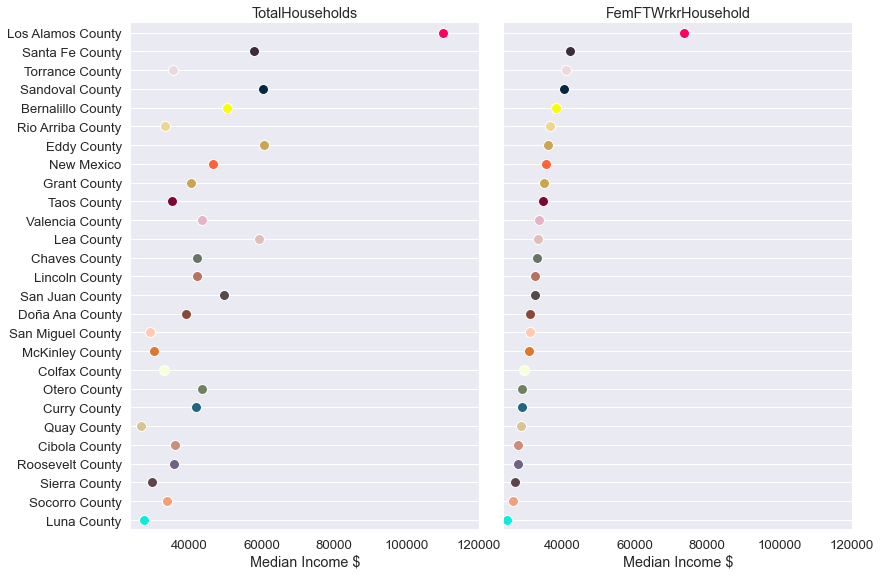

In [63]:
g = sns.PairGrid(economic_chars.sort_values('NonFamilyHousholdMedFemFTWrkr', ascending=False),
             x_vars=['TotalHouseholdsMedIncome', 'NonFamilyHousholdMedFemFTWrkr'],
                 y_vars=['county'], palette=colors_NM,
               height=8, aspect=0.7)

g.map(sns.stripplot, size=10, orient="h", jitter=False, linewidth=1, edgecolor="w")

g.set(xlim=(24000, 120000), ylabel="", xlabel='Median Income $')

titles = ['TotalHouseholds', 'FemFTWrkrHousehold']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
graph.savefig('Household_income_all_and_femaleFT_all_counties.png')

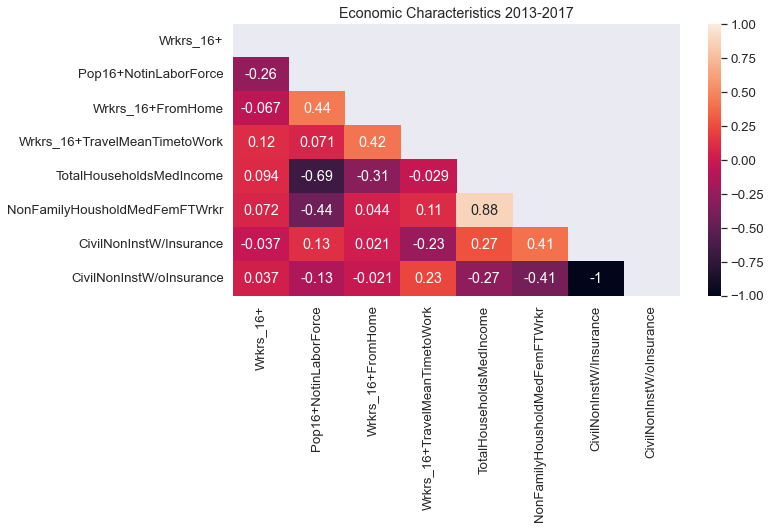

In [64]:
import numpy as np
plt.figure(figsize=(10,5))

mask = np.triu(np.ones_like(economic_chars.corr(), dtype=np.bool))

heatmap = sns.heatmap(economic_chars.corr(), annot=True,
                     mask=mask, vmin=-1, vmax=1)
heatmap.set_title('Economic Characteristics 2013-2017')
graph.savefig('correlation_matrix_economic_characteristics.png')

No handles with labels found to put in legend.


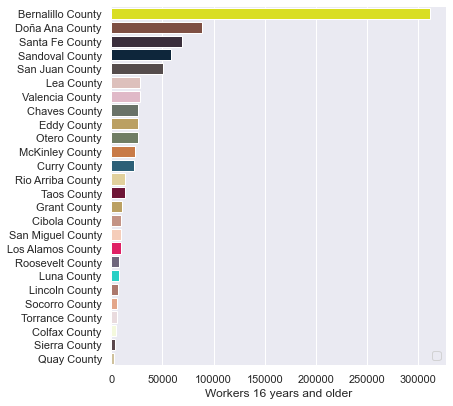

In [66]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6.6))


# Plot the total crashes
sns.barplot(x="Wrkrs_16+", y="county",
            data=economic_chars.loc[economic_chars['county']!='New Mexico'].sort_values('Wrkrs_16+', ascending=False),
           hue_order='county', palette=colors_NM)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Workers 16 years and older")
sns.despine(left=True, bottom=True)

graph.savefig('working_population_by_county.png')

<div class="alert alert-block alert-success">
    <b>Hypothesis: Economic Characteristics by County</b>
    <br>
One of the strongest correlations of economic characteristics are between the total amount of household’s median income and population of people 16 years and older who are not in the labor force, at -0.69. This association between income and labor force makes sense as less people in the workforce would have a lower income. The other strong correlation is between non family households median incomes with females working full time and the total households median incomes, at 0.88 . In terms of working population, Bernanilo county has the highest number of workers by almost 3 times that of Doña Ana County, the second highest number of workers.
</div>

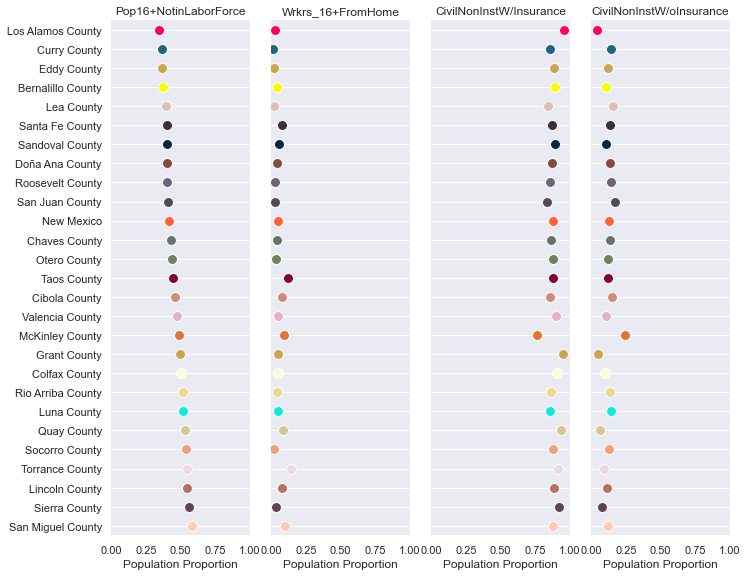

In [65]:
sns.set_theme(style="darkgrid")
g = sns.PairGrid(economic_chars.sort_values('Pop16+NotinLaborForce', ascending=True),
             x_vars=['Pop16+NotinLaborForce', 'Wrkrs_16+FromHome',
                     'CivilNonInstW/Insurance', 'CivilNonInstW/oInsurance'],
                 y_vars=['county'],
               height=8, aspect=0.3)

g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette=colors_NM, linewidth=1, edgecolor="w")

g.set(xlim=(0, 1), ylabel="", xlabel='Population Proportion')

titles = ['Pop16+NotinLaborForce', 'Wrkrs_16+FromHome',
          'CivilNonInstW/Insurance', 'CivilNonInstW/oInsurance']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
graph.savefig('proportions_of_population_by_counties_economic_characteristics.png')